# Mownit lab9

# Imports

In [1]:
using LinearAlgebra
using CSV
using DataFrames
using Plots
using Statistics
using Polynomials

# Zad1

In [2]:
inv_method(A, b) = inv(A) * b
div_method(A, b) = A \ b
fact_method(A, b) = factorize(A) \ b
fact2_method(Af, b) = Af \ b

fact2_method (generic function with 1 method)

### random x and A, b=A*x

In [3]:
x = rand(1000)
A = rand(1000,1000)
b = A * x

1000-element Array{Float64,1}:
 238.11775662859122
 246.88655768326677
 247.25644130189795
 243.1934078693848
 247.5416200678234
 251.198460649774
 239.49578143081783
 250.64342995780183
 238.75547278615423
 248.79520078719895
 254.28737678992618
 240.26415476054032
 253.39008339717054
   ⋮
 249.77466378441602
 253.3100672316027
 257.2309366561487
 241.35431431496184
 245.55961120162291
 245.4989072349377
 240.87353030503377
 240.76502545692304
 255.1515518734691
 242.76482732603577
 241.92940404505384
 239.91811797760857

### inv() method

In [4]:
inv_method(A, b)
@time x_res1 = inv_method(A, b)
x_diff1 = x - x_res1
println("Jakosc wyniku : ", sqrt(dot(x_diff1, x_diff1)))

  0.078774 seconds (6 allocations: 8.133 MiB)
Jakosc wyniku : 5.1132430009449016e-11


### \ method

In [5]:
div_method(A, b)
@time x_res2 = div_method(A, b)
x_diff2 = x - x_res2
println("Jakosc wyniku : ", sqrt(dot(x_diff2, x_diff2)))

  0.036787 seconds (4 allocations: 7.645 MiB)
Jakosc wyniku : 1.862747160650983e-11


### factorize method

In [6]:
fact_method(A, b)
@time x_res3 = fact_method(A, b)
x_diff3 = x - x_res3
println("Jakosc wyniku : ", sqrt(dot(x_diff3, x_diff3)))

  0.042278 seconds (5 allocations: 7.645 MiB)
Jakosc wyniku : 1.862747160650983e-11


### precomputed factorize method

In [7]:
Af = factorize(A)
fact2_method(Af, b)
@time x_res4 = fact2_method(Af, b)
x_diff4 = x - x_res4
println("Jakosc wyniku : ", sqrt(dot(x_diff4, x_diff4)))

  0.000666 seconds (1 allocation: 7.938 KiB)
Jakosc wyniku : 1.862747160650983e-11


# Zad2

19×2 DataFrame
 Row │ Size   Better_mean 
     │ Int64  Float64     
─────┼────────────────────
   1 │   100       4.0358
   2 │   150      12.7748
   3 │   200      30.5183
   4 │   250      61.0696
   5 │   300     114.596
   6 │   350     192.676
   7 │   400     267.396
   8 │   450     440.603
   9 │   500     652.284
  10 │   550     775.396
  11 │   600    1045.7
  12 │   650    1316.78
  13 │   700    1565.02
  14 │   750    1789.84
  15 │   800    2569.24
  16 │   850    2906.72
  17 │   900    3409.8
  18 │   950    4162.71
  19 │  1000    4325.05

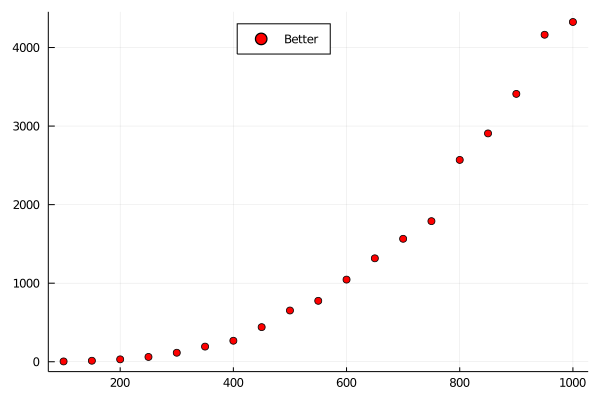

In [8]:
df = CSV.read("c_times.csv", delim=",", DataFrame)
df_grouped = groupby(df, :Size)
df_stats = combine(df_grouped, "Better" => mean)

show(df_stats)
p = plot(df_stats.Size, df_stats.Better_mean, colour = :red,label="Better", seriestype=:scatter, legend=:top)

In [9]:
x = df_stats[:, :Size]
y = df_stats[:, :Better_mean]

A = zeros(19,3)
A[:, 1] = x.^2
A[:, 2] = x
A[:, 3] = ones(19)

function qr_least_squares(A, b)
    A_qr = factorize(A)
    return A_qr.P * (A_qr.R \ ((Transpose(A_qr.Q) * y)[1:3]))
end

qr_least_squares (generic function with 1 method)

In [10]:
qr_least_squares(A, b)
@time wsp_qr = qr_least_squares(A, b)
println("QR wsp: ", wsp_qr)
println("FIT wsp: ", fit(x, y, 2))

  0.021190 seconds (1.61 k allocations: 13.007 MiB, 95.54% gc time)
QR wsp: [0.007314524021819263, -3.2207832099660996, 359.78798934984735]
FIT wsp: 359.788 - 3.22078*x + 0.00731452*x^2


In [11]:
function fit_poly(X, Y)
    n = size(X)[1]
    itp = fit(X, Y, 2)
    x_interpolation = [i for i=X[1]:0.01:X[n]]
    y_interpolation = [itp(x) for x in x_interpolation]
    return x_interpolation, y_interpolation
end

function fit_wsp(X, wsp)
    n = size(X)[1]
    x = [i for i=X[1]:0.01:X[n]]
    y = [wsp[3]*1 + wsp[2]*i + wsp[1]*i^2 for i in x]
    return x, y
    
end

fit_wsp (generic function with 1 method)

In [12]:
plot!(p,fit_poly(x , y), color = :red, label = "FIT")
plot!(p,fit_wsp(x, wsp_qr), color = :green, label = "QR")

# Zad3

### SVD Factorization : A = $USV^T$ , $A^T=VS^{-1}U^T$

### $Ax=b => x=A^Tb => x=VS^{-1}U^Tb$

In [13]:
function svd_least_squares(A, b)
    A_svd = svd(A)
    U , S , V = A_svd.U , A_svd.S, A_svd.V
    S_inv = Diagonal(1 ./ S)
    return V * S_inv * Transpose(U) * y
end

svd_least_squares (generic function with 1 method)

In [14]:
svd_least_squares(A, b)
@time wsp_svd = svd_least_squares(A, b)
println("SVD wsp: ", wsp_svd)
println("FIT wsp: ", fit(x, y, 2))

  0.000063 seconds (13 allocations: 4.453 KiB)
SVD wsp: [0.007314524021819239, -3.2207832099660996, 359.7879893498474]
FIT wsp: 359.788 - 3.22078*x + 0.00731452*x^2


### Least squares używając SVD jest ~50 razy szybszy niż używając QR

In [15]:
plot!(p,fit_wsp(x, wsp_svd), color = :blue, label = "SVD")